In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [2]:
sensor_data = pd.read_csv("D:\\p_eaglesense\\eaglesense\\data\\topviewkinect\\3039\\android_sensor_data.csv")

In [3]:
sensor_data.head()

,frame_id,depth_time,addr,time,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,...,linear_accel_x,linear_accel_y,linear_accel_z,gravity_x,gravity_y,gravity_z,rotation_x,rotation_y,rotation_z,label
0,0,0,10.32.114.115:38932,0.00000,-0.13,0.128,9.758,0.0,8978685.0,0.0,...,0.0,0.0,0.0,6.595770e+12,0.0,50549.5625,0.0,50552.78125,0.0,0
1,0,0,10.32.114.115:38932,0.00482,-0.13,0.128,9.758,0.0,8978685.0,0.0,...,0.0,0.0,0.0,6.595770e+12,0.0,50549.5625,0.0,50552.78125,0.0,0
2,0,0,10.32.114.115:38932,0.00961,-0.13,0.128,9.758,0.0,8978685.0,0.0,...,0.0,0.0,0.0,6.595770e+12,0.0,50549.5625,0.0,50552.78125,0.0,0
3,0,0,10.32.114.115:38932,0.01348,-0.13,0.128,9.758,0.0,8978685.0,0.0,...,0.0,0.0,0.0,6.595770e+12,0.0,50549.5625,0.0,50552.78125,0.0,0
4,0,0,10.32.114.115:38932,0.01831,-0.13,0.128,9.758,0.0,8978685.0,0.0,...,0.0,0.0,0.0,6.595770e+12,0.0,50549.5625,0.0,50552.78125,0.0,0


In [4]:
sensor_data.head()

,frame_id,depth_time,addr,time,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,...,linear_accel_x,linear_accel_y,linear_accel_z,gravity_x,gravity_y,gravity_z,rotation_x,rotation_y,rotation_z,label
0,0,0,10.32.114.115:38932,0.00000,-0.13,0.128,9.758,0.0,8978685.0,0.0,...,0.0,0.0,0.0,6.595770e+12,0.0,50549.5625,0.0,50552.78125,0.0,0
1,0,0,10.32.114.115:38932,0.00482,-0.13,0.128,9.758,0.0,8978685.0,0.0,...,0.0,0.0,0.0,6.595770e+12,0.0,50549.5625,0.0,50552.78125,0.0,0
2,0,0,10.32.114.115:38932,0.00961,-0.13,0.128,9.758,0.0,8978685.0,0.0,...,0.0,0.0,0.0,6.595770e+12,0.0,50549.5625,0.0,50552.78125,0.0,0
3,0,0,10.32.114.115:38932,0.01348,-0.13,0.128,9.758,0.0,8978685.0,0.0,...,0.0,0.0,0.0,6.595770e+12,0.0,50549.5625,0.0,50552.78125,0.0,0
4,0,0,10.32.114.115:38932,0.01831,-0.13,0.128,9.758,0.0,8978685.0,0.0,...,0.0,0.0,0.0,6.595770e+12,0.0,50549.5625,0.0,50552.78125,0.0,0


Text(0.5,1,'linear accel Z')

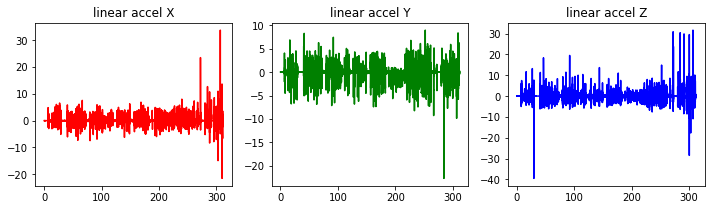

In [6]:
f = plt.figure(figsize=(12,3))

linear_accel_x_ax = f.add_subplot(131)
linear_accel_x_ax.plot(sensor_data["time"], sensor_data["linear_accel_x"], 'r')
plt.title('linear accel X')

linear_accel_y_ax = f.add_subplot(132)
linear_accel_y_ax.plot(sensor_data["time"], sensor_data["linear_accel_y"], 'g')
plt.title('linear accel Y')

linear_accel_z_ax = f.add_subplot(133)
linear_accel_z_ax.plot(sensor_data["time"], sensor_data["linear_accel_z"], 'b')
plt.title('linear accel Z')

In [5]:
pd.unique(sensor_data["label"])

array([0, 1, 2], dtype=int64)

In [7]:
g_rest_indices = sensor_data.index[sensor_data["label"] == 0].tolist()

In [8]:
len(g_rest_indices)

33957

In [9]:
g_inward_indices = sensor_data.index[sensor_data["label"] == 1].tolist()

In [10]:
len(g_inward_indices)

15136

In [11]:
g_outward_indices = sensor_data.index[sensor_data["label"] == 2].tolist()

In [12]:
len(g_outward_indices)

16260

In [30]:
def find_gesture_sequences(gesture_indices):
    
    gesture_sequences = []

    start_index = gesture_indices[0]
    end_index = gesture_indices[0]

    for i, frame_index in enumerate(gesture_indices[1:]):

        # if the gesture is continuing, update end_idx; if not end of the list, continue
        if end_index + 1 == frame_index:
            end_index = frame_index
            if i < len(gesture_indices) - 2:
                continue

        # append gesture sample to list
        if start_index != end_index:
            gesture_sequences.append((start_index, end_index))
            start_index = frame_index
            end_index = frame_index

    return gesture_sequences

In [31]:
g_rest_sequences = find_gesture_sequences(g_rest_indices)
g_inward_sequences = find_gesture_sequences(g_inward_indices)
g_outward_sequences = find_gesture_sequences(g_outward_indices)

In [32]:
len(g_rest_sequences)

26

In [33]:
len(g_inward_sequences)

13

In [34]:
len(g_outward_sequences)

12

In [35]:
# find gesture sequence length

g_rest_durations = []
g_inward_durations = []
g_outward_durations = []

for start_index, end_index in g_rest_sequences:
    g_rest_durations.append(end_index - start_index)
    
for start_index, end_index in g_inward_sequences:
    g_inward_durations.append(end_index - start_index)
    
for start_index, end_index in g_outward_sequences:
    g_outward_durations.append(end_index - start_index)

In [37]:
min(g_rest_durations), max(g_rest_durations)

(355, 6421)

In [39]:
min(g_inward_durations), max(g_inward_durations)

(305, 557)

In [38]:
min(g_outward_durations), max(g_outward_durations)

(288, 536)

In [49]:
window_size = 200 # 200Hz

In [41]:
acceleromter_features = ["linear_accel_x", "linear_accel_y", "linear_accel_z"]

In [42]:
# linear acceleration 3D * win_size
column_size = 3 * window_size

In [43]:
column_size

600

In [44]:
# +1 (label)
columns_X = list(range(column_size))
columns_y = ["label"]
columns_all = list(columns_X)
columns_all.extend(columns_y)

In [83]:
sensor_data_chunks = pd.DataFrame(columns=columns_all)

In [84]:
sensor_data_chunks.head()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,label


In [85]:
def append_windowed_samples(sensor_data_df, gesture_sequences, label):
    
    gesture_samples = []

    for start_index, end_index in gesture_sequences:

        sample_start_index = start_index
        sample_end_index = start_index + window_size

        while(sample_end_index <= end_index):

            # get samples within one window
            g_samples = sensor_data.iloc[list(range(sample_start_index, sample_end_index))]
            g_samples = g_samples[acceleromter_features]

            gesture_samples.append(g_samples)

            # concatenate a window sequence into one sample
            g_samples_w = pd.DataFrame(g_samples.values.reshape(1, -1))
            g_samples_w["label"] = label

            # append to dataframe
            sensor_data_df = sensor_data_df.append(g_samples_w, ignore_index=True)

            # next sample
            sample_start_index = sample_end_index
            sample_end_index = sample_start_index + window_size
            
    return gesture_samples, sensor_data_df

In [86]:
g_rest_samples, sensor_data_chunks = append_windowed_samples(sensor_data_chunks, g_rest_sequences, 0)
g_inward_samples, sensor_data_chunks = append_windowed_samples(sensor_data_chunks, g_inward_sequences, 1)
g_outward_samples, sensor_data_chunks = append_windowed_samples(sensor_data_chunks, g_outward_sequences, 2)

In [87]:
len(g_rest_samples)

112

In [88]:
len(g_inward_samples)

21

In [89]:
len(g_outward_samples)

19

In [63]:
def plot_gesture_samples(gesture_samples):
    example_1 = gesture_samples[0]
    example_2 = gesture_samples[1]
    example_3 = gesture_samples[2]
    example_4 = gesture_samples[3]
    example_5 = gesture_samples[4]

    example_1.reset_index(inplace=True)
    example_2.reset_index(inplace=True)
    example_3.reset_index(inplace=True)
    example_4.reset_index(inplace=True)
    example_5.reset_index(inplace=True)
    
    example_1["time"] = example_1.index
    example_2["time"] = example_2.index
    example_3["time"] = example_3.index
    example_4["time"] = example_4.index
    example_5["time"] = example_5.index
    
    f = plt.figure(figsize=(20,10))

    linear_accel_x_ax = f.add_subplot(5,3,1)
    linear_accel_x_ax.plot(example_1["time"], example_1["linear_accel_x"], 'r')
    plt.title('linear accel X')
    linear_accel_y_ax = f.add_subplot(5,3,2)
    linear_accel_y_ax.plot(example_1["time"], example_1["linear_accel_y"], 'g')
    plt.title('linear accel Y')
    linear_accel_z_ax = f.add_subplot(5,3,3)
    linear_accel_z_ax.plot(example_1["time"], example_1["linear_accel_z"], 'b')
    plt.title('linear accel Z')

    linear_accel_x_ax = f.add_subplot(5,3,4)
    linear_accel_x_ax.plot(example_2["time"], example_2["linear_accel_x"], 'r')
    linear_accel_y_ax = f.add_subplot(5,3,5)
    linear_accel_y_ax.plot(example_2["time"], example_2["linear_accel_y"], 'g')
    linear_accel_z_ax = f.add_subplot(5,3,6)
    linear_accel_z_ax.plot(example_2["time"], example_2["linear_accel_z"], 'b')

    linear_accel_x_ax = f.add_subplot(5,3,7)
    linear_accel_x_ax.plot(example_3["time"], example_3["linear_accel_x"], 'r')
    linear_accel_y_ax = f.add_subplot(5,3,8)
    linear_accel_y_ax.plot(example_3["time"], example_3["linear_accel_y"], 'g')
    linear_accel_z_ax = f.add_subplot(5,3,9)
    linear_accel_z_ax.plot(example_3["time"], example_3["linear_accel_z"], 'b')

    linear_accel_x_ax = f.add_subplot(5,3,10)
    linear_accel_x_ax.plot(example_4["time"], example_4["linear_accel_x"], 'r')
    linear_accel_y_ax = f.add_subplot(5,3,11)
    linear_accel_y_ax.plot(example_4["time"], example_4["linear_accel_y"], 'g')
    linear_accel_z_ax = f.add_subplot(5,3,12)
    linear_accel_z_ax.plot(example_4["time"], example_4["linear_accel_z"], 'b')

    linear_accel_x_ax = f.add_subplot(5,3,13)
    linear_accel_x_ax.plot(example_5["time"], example_5["linear_accel_x"], 'r')
    linear_accel_y_ax = f.add_subplot(5,3,14)
    linear_accel_y_ax.plot(example_5["time"], example_5["linear_accel_y"], 'g')
    linear_accel_z_ax = f.add_subplot(5,3,15)
    linear_accel_z_ax.plot(example_5["time"], example_5["linear_accel_z"], 'b')

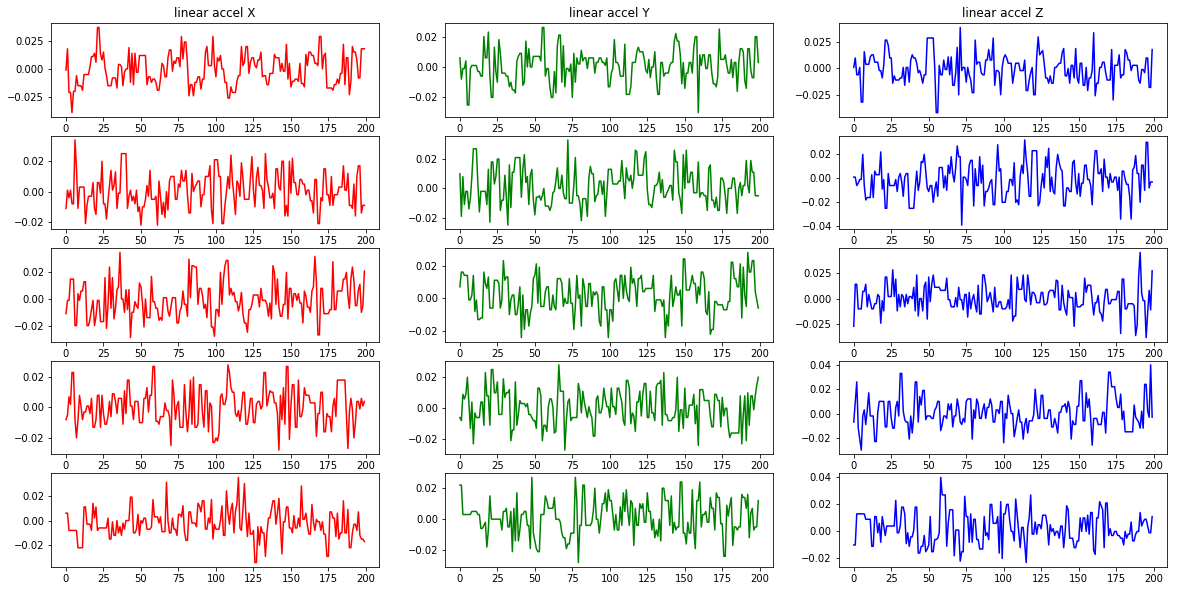

In [64]:
plot_gesture_samples(g_rest_samples)

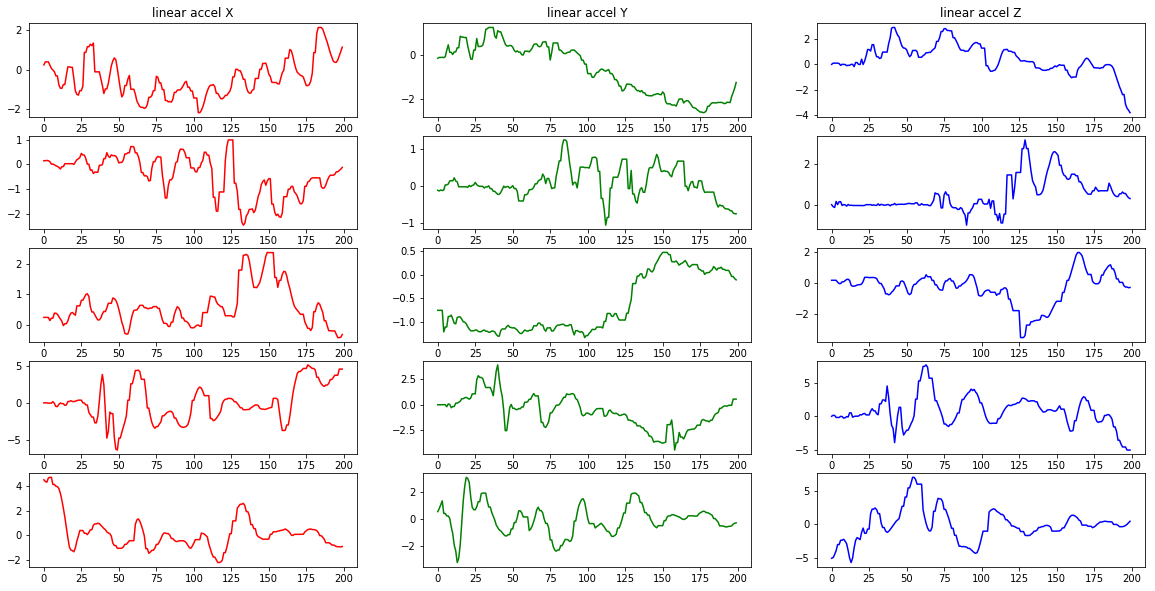

In [65]:
plot_gesture_samples(g_inward_samples)

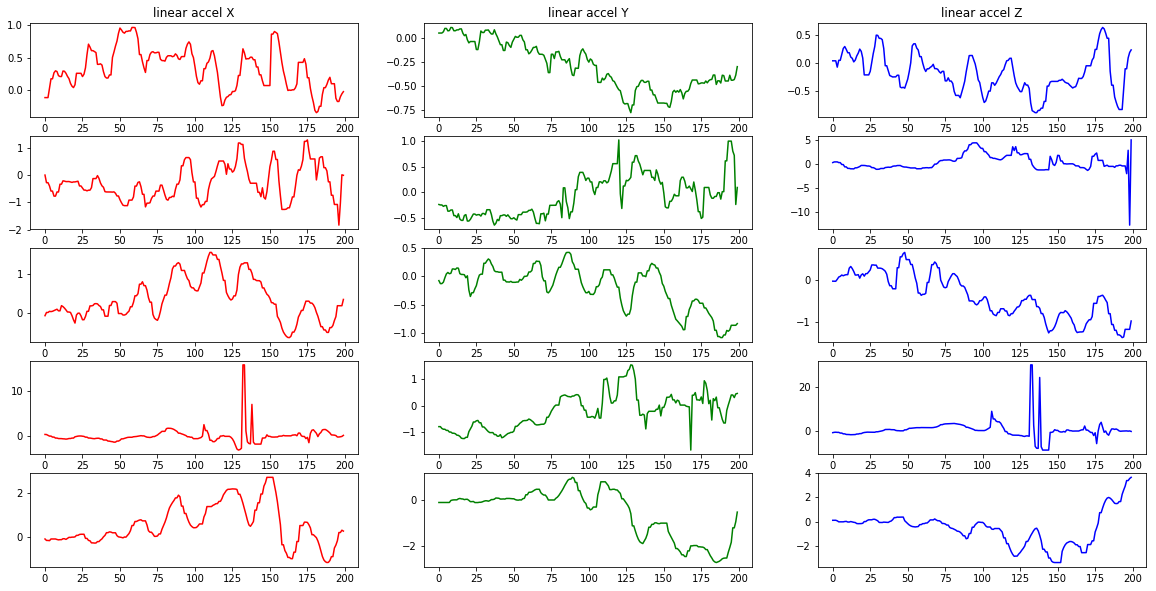

In [66]:
plot_gesture_samples(g_outward_samples)

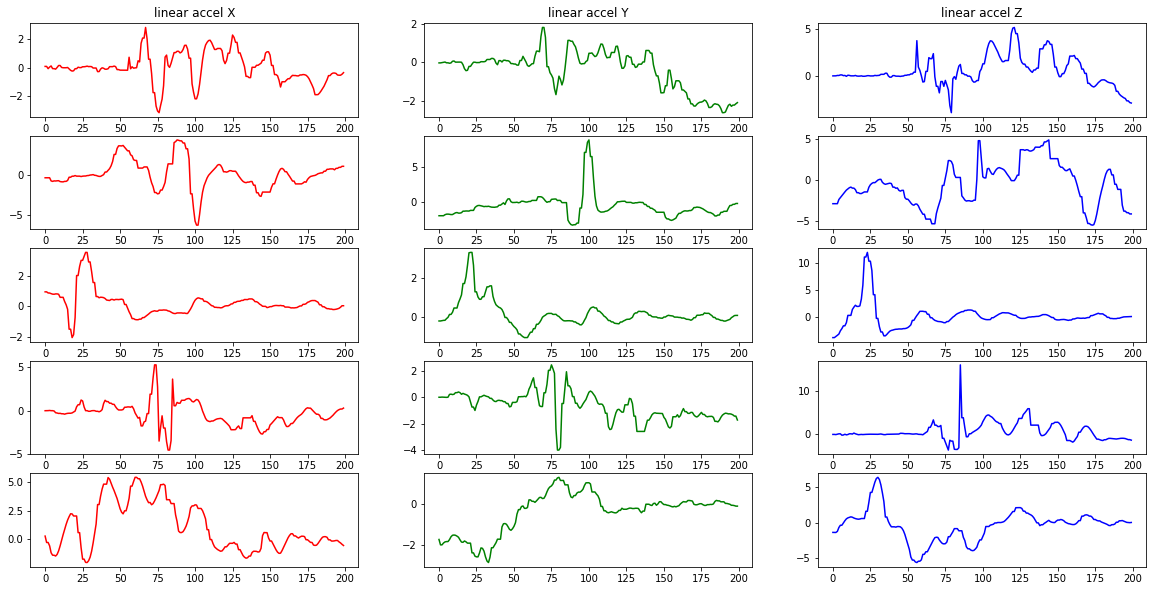

In [67]:
sensor_data_chunks.head()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,label
0,-0.001,0.006,0.001,0.018,-0.008,0.010,-0.021,-0.001,-0.006,-0.021,...,0.018,0.020,-0.018,0.018,0.020,-0.018,0.018,0.003,0.018,1
1,-0.011,0.010,0.001,0.001,-0.019,0.001,-0.004,0.008,-0.006,0.001,...,-0.014,-0.005,-0.008,-0.009,-0.005,-0.003,-0.009,-0.005,-0.003,1
2,-0.011,0.007,-0.027,-0.001,0.016,0.014,-0.001,0.016,0.014,0.015,...,-0.010,0.004,0.008,-0.005,-0.001,-0.011,0.021,-0.006,0.027,1
3,-0.008,-0.006,-0.007,-0.005,-0.008,0.010,0.007,0.009,0.026,0.002,...,0.006,0.008,-0.003,0.001,0.015,0.040,0.004,0.020,-0.003,1
4,0.006,0.022,-0.010,0.006,0.022,-0.010,-0.008,0.003,0.013,-0.008,...,-0.015,-0.005,-0.001,-0.015,-0.005,-0.001,-0.017,0.012,0.011,1


In [90]:
sensor_data_chunks.shape

(152, 601)

In [91]:
num_rest_gestures = len(sensor_data_chunks[sensor_data_chunks["label"] == 0])

In [97]:
num_rest_gestures

112

In [93]:
num_inward_gestures = len(sensor_data_chunks[sensor_data_chunks["label"] == 1])

In [94]:
num_inward_gestures

21

In [95]:
num_outward_gestures = len(sensor_data_chunks[sensor_data_chunks["label"] == 2])

In [96]:
num_outward_gestures

19

In [98]:
sensor_data_X = sensor_data_chunks[columns_X]
sensor_data_y = sensor_data_chunks[columns_y]

In [99]:
X = sensor_data_X.values
y = sensor_data_y["label"].values

In [102]:
y = y.astype("int")

In [119]:
np.unique(y)

array([0, 1, 2])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [106]:
X_train.shape, y_train.shape

((106, 600), (106,))

In [107]:
X_test.shape, y_test.shape

((46, 600), (46,))

In [109]:
import pickle

In [110]:
with open("sensor-data-3036-X.pkl", "wb") as fid:
    pickle.dump(X, fid)

with open("sensor-data-3036-y.pkl", "wb") as fid:
    pickle.dump(y, fid)

In [171]:
linear_accel_svm = svm.SVC(C=1, kernel="rbf", degree=1, class_weight="balanced", random_state=42, verbose=True)

In [172]:
linear_accel_svm.fit(X_train, y_train)

[LibSVM]

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=True)

In [173]:
y_true = list(y_test)

In [174]:
y_pred = linear_accel_svm.predict(X_test)

In [175]:
accuracy = accuracy_score(y_true, y_pred)

In [176]:
accuracy

0.89130434782608692

In [177]:
fl = f1_score(y_true, y_pred, average="weighted")

In [178]:
fl

0.87955711585201179

In [180]:
# ALL DATA
linear_accel_svm.fit(X, y)

[LibSVM]

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=True)

In [179]:
import pickle

In [181]:
# save the classifier
with open("3-gesture-linear-accel-svm.pkl", "wb") as fid:
    pickle.dump(linear_accel_svm, fid)

In [182]:
# load it again
with open("3-gesture-linear-accel-svm.pkl", "rb") as fid:
    linear_accel_svm_loaded = pickle.load(fid)

In [183]:
y_pred = linear_accel_svm_loaded.predict(X_test)

In [184]:
accuracy = accuracy_score(y_true, y_pred)

In [185]:
accuracy

1.0